In [1]:
import sys
from RF_class import RF_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob

model = RF_model()

In [2]:
# hyper_params = {}
# hyper_params['n_estimators'] = [20, 51, 82, 113, 144, 175, 206, 237, 268, 300]
# hyper_params['max_features'] = ['sqrt', 'log2']
# hyper_params['max_depth'] = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# hyper_params['min_samples_split'] = [2, 5, 10]
# hyper_params['min_samples_leaf'] = [1, 2, 4]

hyper_params = {'rf__n_estimators': [150],
                'rf__max_features': ['sqrt'],
                'rf__max_depth':  [25],
                'rf__min_samples_split': [2],
                'rf__min_samples_leaf': [3]}

In [3]:
training_path = '/users/yhb18174/Recreating_DMTA/datasets/ChEMBL/training_data/'
targs_df = pd.read_csv(training_path+'dock/ChEMBL_docking_df.csv', index_col='ID')
targs = targs_df['CNN_affinity']
targs
feats_df = pd.read_csv(training_path+'desc/rdkit/ChEMBL_rdkit_desc_1.csv.gz', index_col='ID', compression='gzip')
save_path='/users/yhb18174/Recreating_DMTA/results/rdkit_desc/init_RF_model/it0'

In [4]:
same_value_columns = feats_df.columns[~feats_df.apply(lambda col: col.nunique() == 1)]
df = feats_df[same_value_columns]
df
    

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_unbrch_alkane,fr_urea
ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL3979343,13.317538,13.317538,0.122687,-3.774721,0.484645,15.871795,547.641,518.409,547.200173,202,...,0,1,0,0,0,1,0,0,0,0
CHEMBL4089152,12.843618,12.843618,0.076179,-0.499940,0.476300,14.857143,378.432,356.256,378.169191,144,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4084046,12.034401,12.034401,0.150556,-0.720045,0.726994,11.000000,335.230,319.102,334.052735,114,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4069010,12.711747,12.711747,0.043889,-0.717034,0.738587,12.217391,308.313,294.201,308.092832,116,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4071717,11.938057,11.938057,0.063368,-0.304020,0.805570,10.166667,411.683,395.555,410.003282,126,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4069308,12.546179,12.546179,0.037344,0.037344,0.730899,14.727273,310.422,292.278,310.113984,112,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1507539,12.532657,12.532657,0.200561,-0.468584,0.916147,23.565217,316.357,296.197,316.142307,122,...,0,0,0,0,0,0,0,0,0,0
CHEMBL188678,12.914883,12.914883,0.011012,-0.011012,0.374251,14.733333,413.498,394.346,413.108564,148,...,0,0,0,0,0,0,0,0,0,0


ft_tr: (737, 175)
ft_val: (317, 175)
tg_tr: (737,)
tg_val: (317,)


Performing resample 5
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 3
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 1
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 17
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 19
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 23
feat: (737, 175)
tg: (737,)
ft_tr: (515, 175)
ft_te: (222, 175)
tg_tr: (515,)
tg_te: (222,)
feat_tr df: (515, 175)
feat_te df: (222, 175)
Performing resample 15
feat: (737, 17

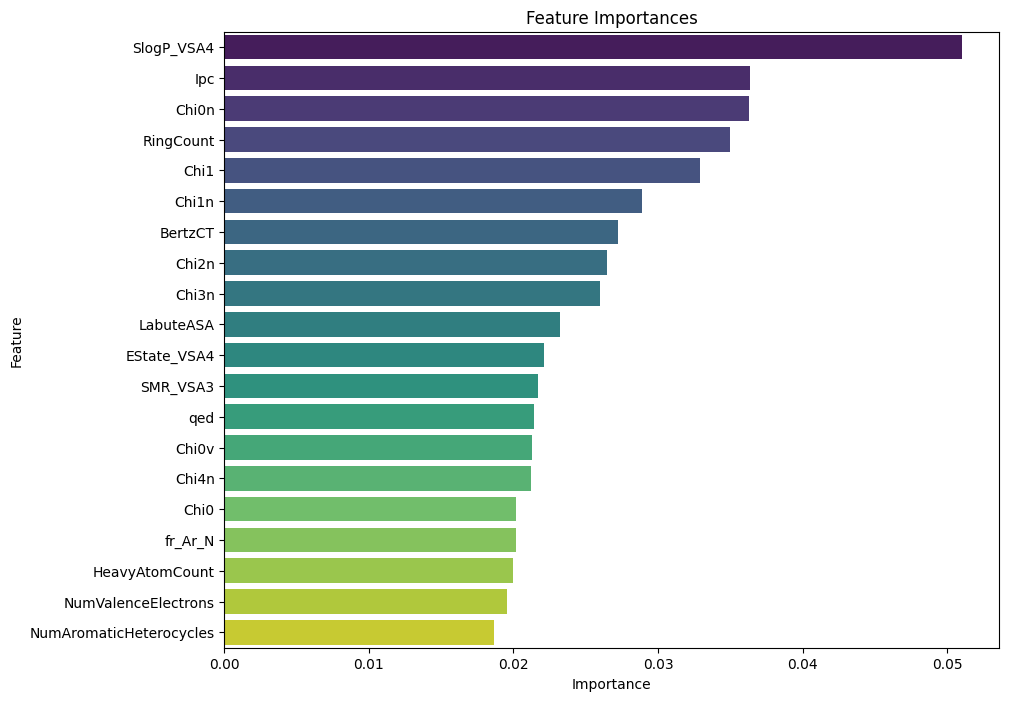

In [5]:
best_params_, performance, feature_importances, resample_number, true_vals_ls, pred_vals_ls, cv_scores, feat_val, targ_val= model.Train_Regressor(search_type='grid',
                      hyper_params=hyper_params,
                      features=df,
                      targets=targs,
                      save_path=save_path,
                      save_final_model=True,
                      plot_feat_importance=True)

In [10]:
preds = model.Predict(feats=feat_val, save_preds=False, calc_mpo=False)

/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/envs/phd_env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/users/yhb18174/.conda/en

In [11]:
preds['affinity_pred']

ID
CHEMBL2349359    6.537525
CHEMBL3780381    6.157993
CHEMBL4098824    6.436147
CHEMBL4176830    6.363794
CHEMBL3780143    5.925956
                   ...   
CHEMBL4212636    6.982026
CHEMBL4203699    5.787139
CHEMBL4161994    6.369416
CHEMBL4167996    7.704312
CHEMBL4168214    6.345817
Name: affinity_pred, Length: 317, dtype: float64

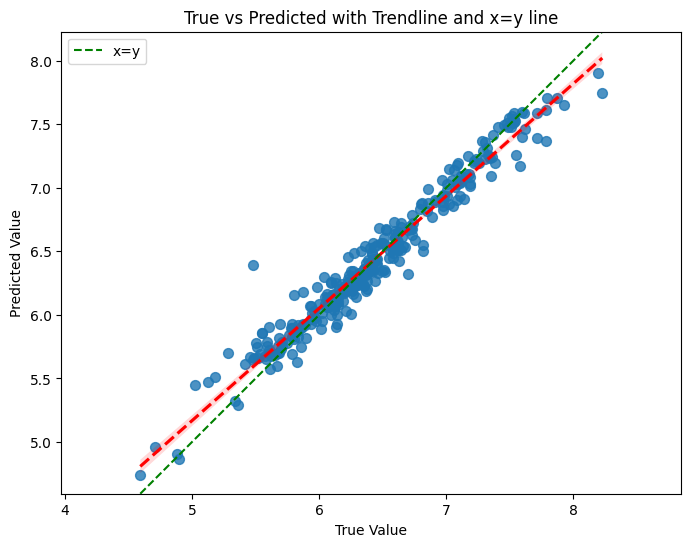

In [12]:
true = targ_val
pred = preds['affinity_pred']

data = pd.DataFrame({
    'True_Val': true,
    'Pred_Val': pred
    })

plt.figure(figsize=(8,6))

sns.regplot(x='True_Val',
            y='Pred_Val',
            data=data,
            scatter_kws={'s': 50},
            line_kws = {'color': 'red',
                        'linestyle':'--'})

plt.axis('equal')

# Determine axis limits
min_val = min(np.min(true), np.min(pred))
max_val = max(np.max(true), np.max(pred))
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

plt.plot([min_val, max_val], [min_val, max_val], 'g--', label='x=y')

plt.legend()
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('True vs Predicted with Trendline and x=y line')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

errors = true - pred


# Calculate performance metrics
bias = np.mean(errors)
sdep = (np.mean((true-pred-(np.mean(true-pred)))**2))**0.5
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
r2 = r2_score(true, pred)

In [14]:
print(bias)
print(sdep)
print(mse)
print(rmse)
print(r2)

0.0008306187837167053
0.13974472050299072
0.019529276836022857
0.13974718900937813
0.9518266429820669
